In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
from pysfa import SFA

## Import data

In [2]:
df = pd.read_csv('../data/msfa_data.csv')

## Create object

In [3]:
m = df.shape[0]
s = np.sqrt(df['uhc_variance'].values)
#
x = df['physicians'].values
z = np.ones((m,1))
d = np.ones((m,1))
y = df['uhc'].values
#
sfa = SFA(x.reshape(m,1), z, d, s, Y=y, add_intercept_to_x=True)

number of studies:      5460
number of measurements: 5460
dimension of beta:      2
dimension of gama:      1
dimension of deta:      1
cond number of X cov:   25.2691345611
cond number of Z cov:   1.0
cond number of D cov:   1.0


In [4]:
# add splines
knots = np.array([np.min(x), 10.0, 20.0, 40.0, np.max(x)])
degree = 3
sfa.addBSpline(knots, degree, r_linear=True, bspline_mono='increasing')

## Fit data

In [5]:
sfa.optimizeSFA()

../src/pysfa.py:450: RuntimeWarning: invalid value encountered in sqrt
  sv = sqrt(vv)
../src/pysfa.py:449: RuntimeWarning: invalid value encountered in sqrt
  su = sqrt(vu)


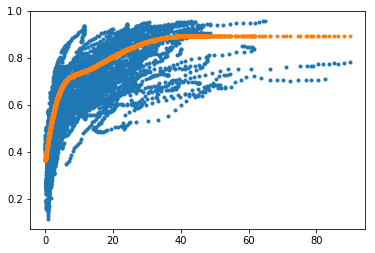

In [6]:
plt.plot(x, y, '.')
plt.plot(x, sfa.X.dot(sfa.beta_soln), '.')

In [7]:
np.sqrt(sfa.deta_soln)

array([ 0.07251942])